In [1]:
# To find ECD Control

import sys 
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram')


In [2]:
import numpy as np
from qutip import *
from ECD_batch_optimizerV1 import BatchOptimizer
import matplotlib.pyplot as plt


Need tf version 2.3.0 or later. Using tensorflow version: 2.7.0



In [21]:
%load_ext autoreload
%autoreload 2

In [3]:
#The target oscillator state.
N =10
Fock = 1
psi_i = tensor(basis(2,0), basis(N,0)) # initial state
psi_t = tensor(basis(2,0), basis(N,Fock)) #target state

In [4]:
#Optimization of ECD Circuit parameters (betas, phis, and thetas)
#the optimization options
opt_params = {
'N_blocks' : 4, #circuit depth
'N_multistart' : 200, #Batch size (number of circuit optimizations to run in parallel)
'epochs' : 200, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.995, #terminal fidelitiy
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'initial_states' : [psi_i], #qubit tensor oscillator, start in |g> |0>
'target_states' : [psi_t], #end in |e> |target>.
'name' : 'Fock %d' % Fock, #name for printing and saving
'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
}


#note: optimizer includes pi pulse in every ECD step. However, final ECD step is implemented 
#in experiment as a displacement since the qubit and oscillator should be disentangled at this point.
#So, we ask the optimizer to end in |e> |target> instead of |g>|target>.

#### Filename for angles to be stored

In [5]:
#create optimization object. 
#initial params will be randomized upon creation
opt = BatchOptimizer(**opt_params)

#print optimization info. 
opt.print_info()

None
Tensor("alphas:0", shape=(1, 200), dtype=complex64)
Tensor("alphas:0", shape=(4, 200), dtype=complex64)
optimization_type: state transfer
N_multistart: 200
N_blocks: 4
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 1
comment: 
user_angles: None
N_cav: 10
filename: Fock 1.h5

Best circuit parameters found:
betas:         [ 2.19872-0.65998j  0.76689+0.24555j -0.69103-0.0713j   1.06802+1.15811j]
alphas:        [0.+0.j]
phis (deg):    [   0.        64.19576 -108.02313  -45.16737]
thetas (deg):  [  63.23806   71.3762   104.75621 -115.86081]
Max Fidelity:  0.364059




In [6]:
#run optimizer.
opt.optimize()

Start time: 2022-09-14 09:49:36
 Epoch: 200 / 200 Max Fid: 0.981403 Avg Fid: 0.865664 Max dFid: 0.000308 Avg dFid: 0.000001 Elapsed time: 0:01:31.615492 Remaing time: 0:00:00.4579405

Optimization stopped.  Reached maximum number of epochs. Terminal fidelity not reached.

optimization_type: state transfer
N_multistart: 200
N_blocks: 4
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 1
comment: 
user_angles: None
N_cav: 10
filename: Fock 1.h5

Best circuit parameters found:
betas:         [-1.50361+0.43967j  0.28434+0.97237j -0.62788+0.1836j   0.     +0.j     ]
alphas:        [0.+0.j]
phis (deg):    [  0.       89.99996 -90.00018  -0.0001 ]
thetas (deg):  [-89.99997 -90.00007  89.99999 -90.00008]
Max Fidelity:  0.981403


termination reason: epochs
optimization timestamp (start time): 2022-09-14 09:49:36
timestamp (end time)

'2022-09-14 09:49:36'

In [7]:
#can print info, including the best circuit found.
opt.print_info() 

optimization_type: state transfer
N_multistart: 200
N_blocks: 4
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 1
comment: 
user_angles: None
N_cav: 10
filename: Fock 1.h5

Best circuit parameters found:
betas:         [-1.50361+0.43967j  0.28434+0.97237j -0.62788+0.1836j   0.     +0.j     ]
alphas:        [0.+0.j]
phis (deg):    [  0.       89.99996 -90.00018  -0.0001 ]
thetas (deg):  [-89.99997 -90.00007  89.99999 -90.00008]
Max Fidelity:  0.981403




In [8]:
angles_filename = 'test_opt_angles.txt'
opt.save_angles(filename = angles_filename)

# Get Pulses

In [23]:
from Simulation_Classes import *
# Classes: ecd_pulse_single_mode to get pulses
#          , qutip_sim_single_mode to simulate on qutip

In [10]:
pulse_sim = ecd_pulse_single_mode(param_file = angles_filename)

In [11]:
pulse_sim.get_pulses()

Modified method: Cond Disp Circuit
Modified conditional displacement called
---------------------------
Final Displacement: 1.567527552920673
Modified conditional displacement called


C:\Users\Eesh Gupta\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


---------------------------
Final Displacement: 1.0130916807757908
Modified conditional displacement called
---------------------------
Final Displacement: 0.6541733575811016
Modified conditional displacement called
---------------------------
Final Displacement: 2.657938934415294e-06


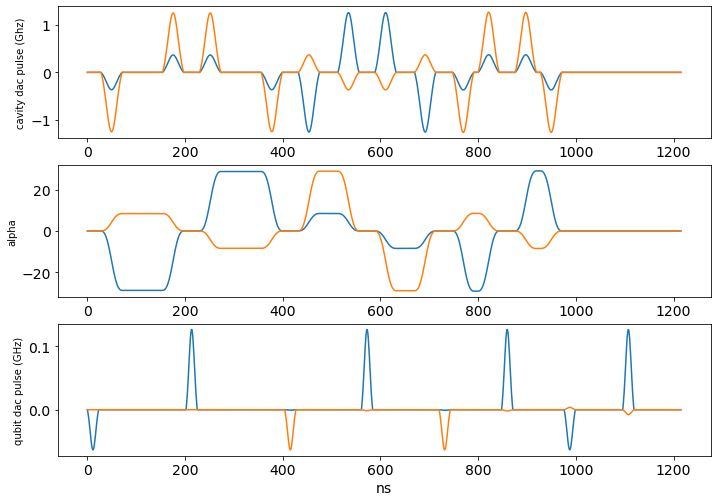

In [12]:
pulse_sim.plot_pulses()

# Qutip Simulation

In [13]:
qutip_sim  = qutip_sim_single_mode(n_q = 2, n_c = 10, alpha = pulse_sim.alpha, qubit_pulse = pulse_sim.qubit_dac_pulse_GHz)

In [14]:
# Add various terms 

# to the hamiltonian 
qutip_sim.add_bare_qubit_mode_coupling() # chi/2 adag a sigmaz
qutip_sim.add_stark_shift() # chi/2 alpha^2 sigmaz

# to the collapse operators (noise)
qutip_sim.add_qubit_relaxation(T1 = 30e+3) # T1 in nanoseconds
qutip_sim.add_qubit_dephasing(T1 = 30e+3, Techo = 50e+3) # T1, T2 in nanoseconds
qutip_sim.add_cavity_relaxation(T1 = 2e+6) # assumes kappa correction to equation of motion in pulses
qutip_sim.add_cavity_dephasing(T1 = 2e+6, Techo = 3e+6) # T1, T2 from photon blockade paper


In [17]:
qutip_sim.me_solve(initial = psi_i)  #initial state by default is g0

Loaded list object.


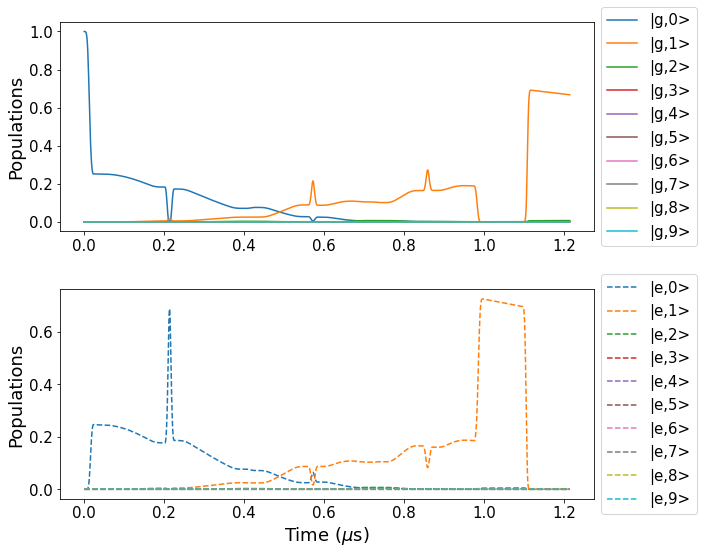

In [18]:
qutip_sim.plot_populations_single_mode()

In [25]:
qutip_sim.get_fidelity(target=psi_t)

0.667634747856152